In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load in data

In [30]:
file_path = "/Users/louismccallum/Downloads/myLearnerData-17.json"
data = pd.read_json(file_path)["input"].values
data = np.array([np.array(i) for i in data])

In [31]:
data.shape

(92, 51)

### Do you need to trim off any data from the start or end of the recording?

In [87]:
start = 0
end = -1
body_data = pd.DataFrame(data[:,0][start:end])

### Rolling Average


<AxesSubplot:>

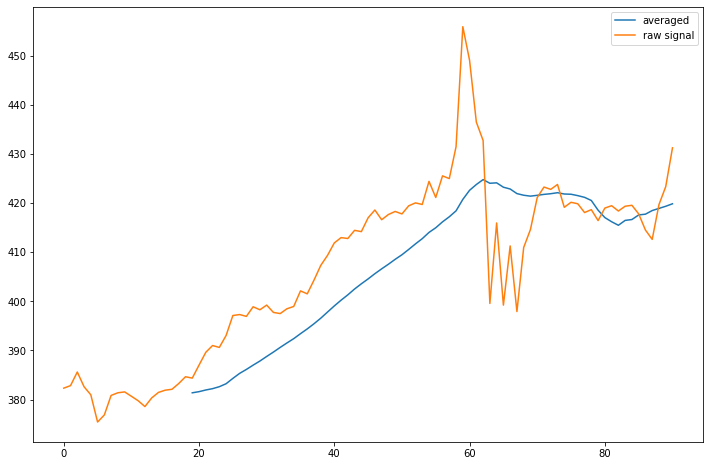

In [88]:
toPlot = pd.DataFrame([])

#Change window size
av_win = 20

toPlot["averaged"] = body_data.rolling(av_win).mean()[0]
toPlot["raw signal"] = body_data
toPlot.plot(figsize=(12,8))

### Standard Deviation 

<AxesSubplot:>

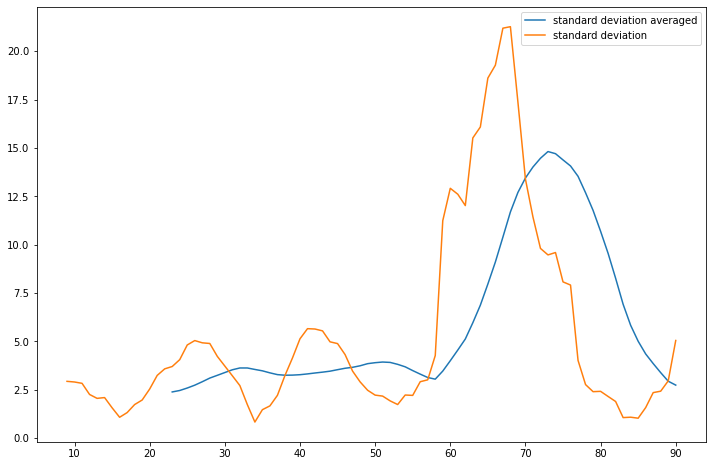

In [89]:
toPlot = pd.DataFrame([])

#Window for measuring standard deviation 
std_win = 10
#Window for rolling average on standard deviation
av_win = 15

toPlot["standard deviation averaged"] = body_data.rolling(std_win).std().rolling(av_win).mean()[0]
toPlot["standard deviation"] = body_data.rolling(std_win).std()[0]
toPlot.plot(figsize=(12,8))

<AxesSubplot:>

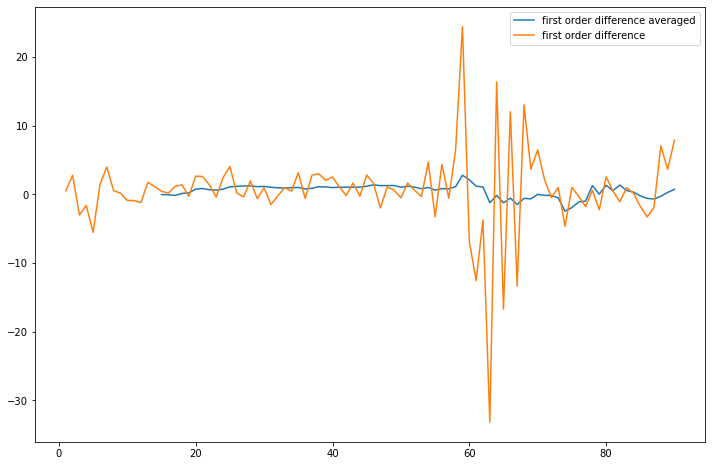

In [92]:
toPlot = pd.DataFrame([])

#Window for rolling average on first order difference
av_win = 15

toPlot["first order difference averaged"] = body_data.diff(1).rolling(av_win).mean()[0]
toPlot["first order difference"] = body_data.diff(1)[0]
toPlot.plot(figsize=(12,8))